In [1]:
# XGBOOST Fima Indian Diabetes Sets

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from numpy import loadtxt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

def calculate_accuracy(model, x_test, y_test):
    # make predictions
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]

    # evaluations
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

# load data
dataset = loadtxt('/content/drive/MyDrive/CodeData/Data/ML/pima-indians-diabetes.csv', delimiter=',')
# split data into X and Y
X = dataset[:, 0:8]
y = dataset[:, 8]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

# fit model into training-data
model = XGBClassifier()
model.fit(x_train, y_train)

# 예전모델
calculate_accuracy(model, x_test, y_test)

Accuracy: 75.97%


0.7597402597402597

In [3]:
# https://xgboost.readthedocs.io/en/latest/parameter.html#parameters-for-tree-booster

model = XGBClassifier(
    booster='gbtree',
    objective='binary:logistic',
    learning_rate=0.03,
    n_estimators=150,
    reg_alpha =0.15,
    reg_lambda=0.7,
    max_depth=4,
    subsample=1
)
model.fit(
    x_train,
    y_train,
    eval_metric='map',
    verbose=True
)

print(model.evals_result)
calculate_accuracy(model, x_test, y_test)

<bound method XGBModel.evals_result of XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)>
Accuracy: 81.82%


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


0.8181818181818182

In [4]:
# pima indians diabetes
"""
# 1. Number of times pregnant
# 2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
# 3. Diastolic blood pressure (mm Hg)
# 4. Triceps skin fold thickness (mm)
# 5. 2-Hour serum insulin (mu U/ml)
# 6. Body mass index (weight in kg/(height in m)^2)
# 7. Diabetes pedigree function
# 8. Age (years)
# 9. Class variable (0 or 1) -- diabetes
"""
names = [
    '# of preganant',
    'Glucose concentration',
    'Blood pressure',
    'Skin fold thinckness',
    '2-hour insulin',
    'BMI',
    'Diabetes pedigree',
    'Age',
    'Result'
]

In [5]:
patient = {
    'Pregnancies': [1],
    'Glucose': [161],
    'BloodPressure': [72],
    'SkinThickness': [35],
    'Insulin': [0],
    'BMI': [28.1],
    'DiabetesPedigreeFunction': [0.527],
    'Age': [20]
}
value_patient = [[1, 161, 72, 35, 0, 28.1, 0.527, 20]]

l = model.predict_proba(value_patient)
print('No diabetes: {:.2%}\n Yes diabetes: {:.2%}'.format(l[0][0], l[0][1]))

No diabetes: 55.00%
 Yes diabetes: 45.00%


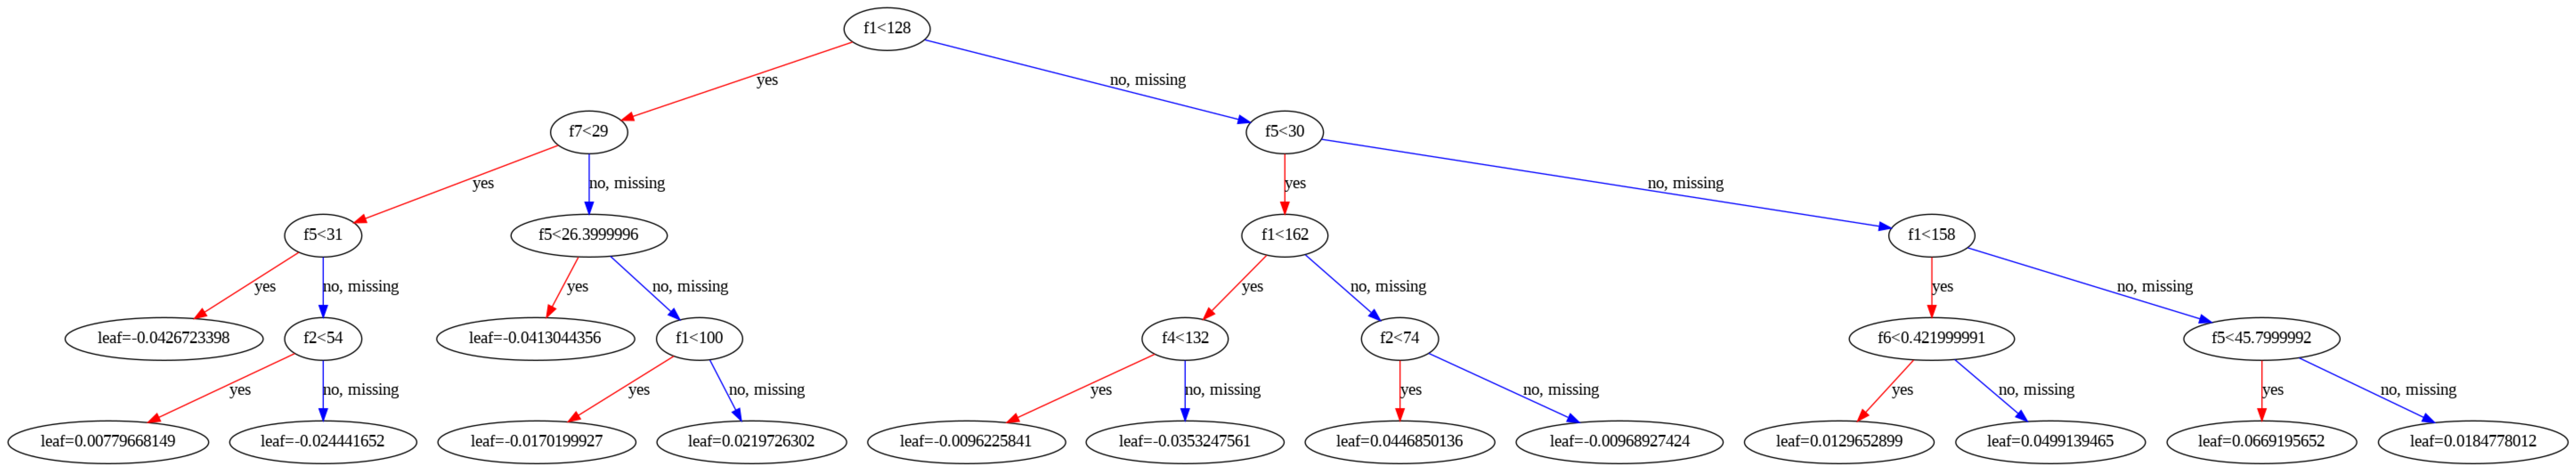

In [6]:
%matplotlib inline
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

import matplotlib.pyplot as plt

from xgboost import plot_tree
from matplotlib.pylab import rcParams

##set up the parameters
rcParams['figure.figsize'] = 100,200

plot_tree(model)
plt.show()

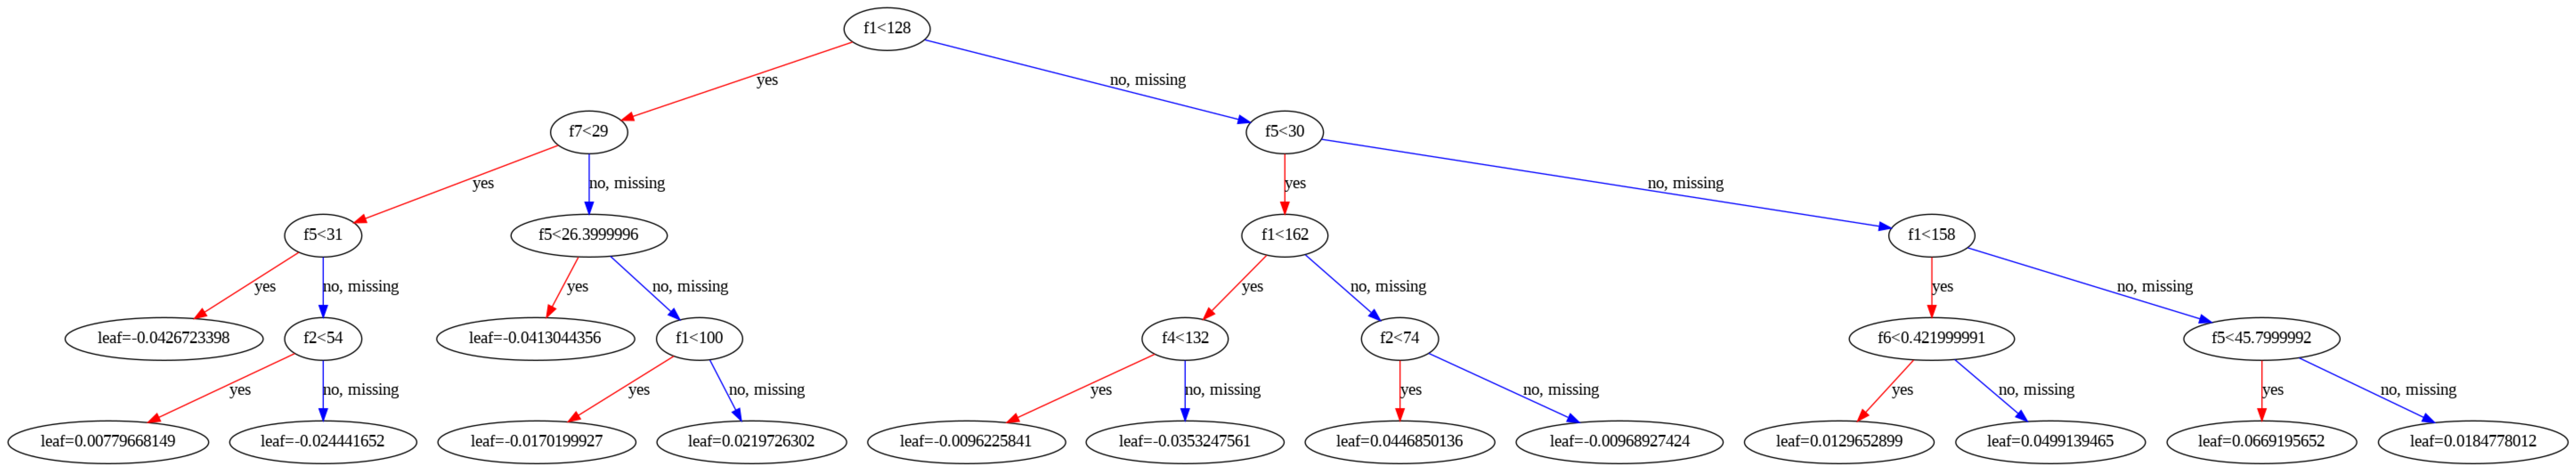

In [7]:
plot_tree(model, num_trees=0)
plt.show()

In [14]:
model

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

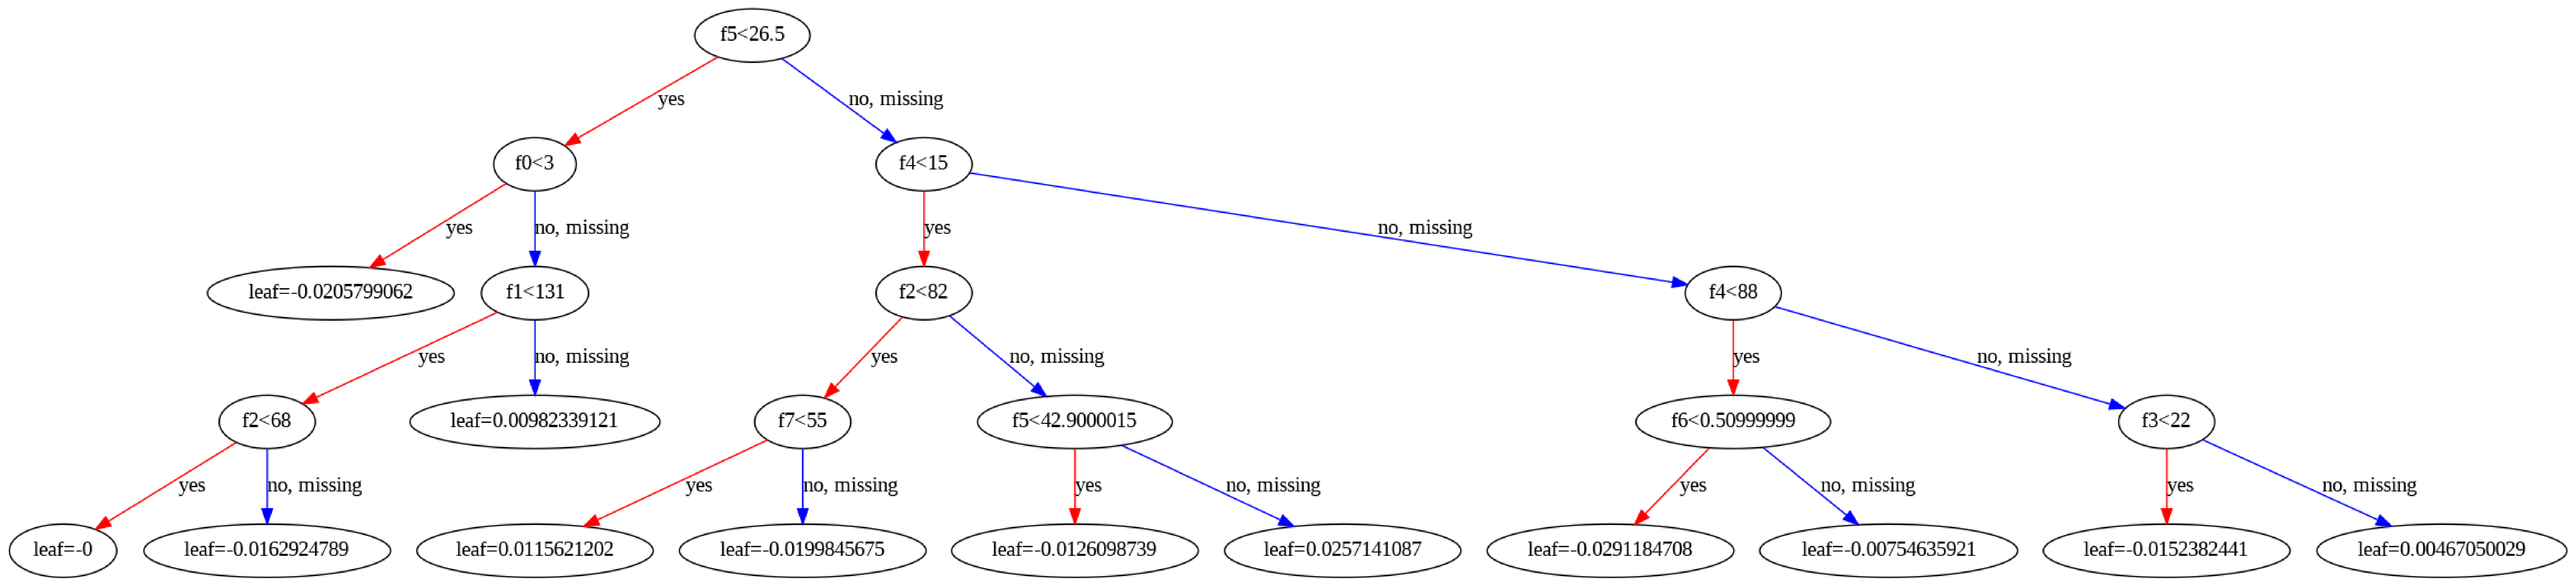

In [15]:
plot_tree(model, num_trees=149)
plt.show()

In [16]:
plot_tree(model, num_trees=150)
plt.show()

IndexError: ignored